# CaseStudy_Week14
## Dataset used : Wine.csv

#### Do the following in the wine dataset.
#### 1. Read the dataset to the python environment.
#### 2. Try out different clustering models in the wine dataset.
#### 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.

#### Loading all necessary libraries to start the analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

## Read the dataset to the python environment.

In [2]:
data = pd.read_csv(r'C:\Users\deepthi777\Documents\My World of Learning\ICTAK\Week_14\CaseStudy\Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Exploratory Data Analysis (EDA)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [4]:
data.shape

(178, 13)

In [5]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Checking if there are null values, as we can see our dataset doesn't have any null values.

In [6]:
data.isnull().sum().sort_values(ascending=False)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

#### Checking the skewness of our dataset.
#### * A normally distribuited data has a skewness close to zero.
#### * Skewness greather than zero means that there is more weight in the left side of the data.
#### * In another hand, skewness smaller than 0 means that there is more weight in the right side of the data

In [7]:
data.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

#### Plotting the histogram of each numerical variable (in this case, all features), the main idea here is to visualize the data distribution for each feature. This method can bring fast insights as:
#### * Check the kind of each feature distribution
#### * Check data symmetry
#### * Verify features frequency
#### * Identify outliers

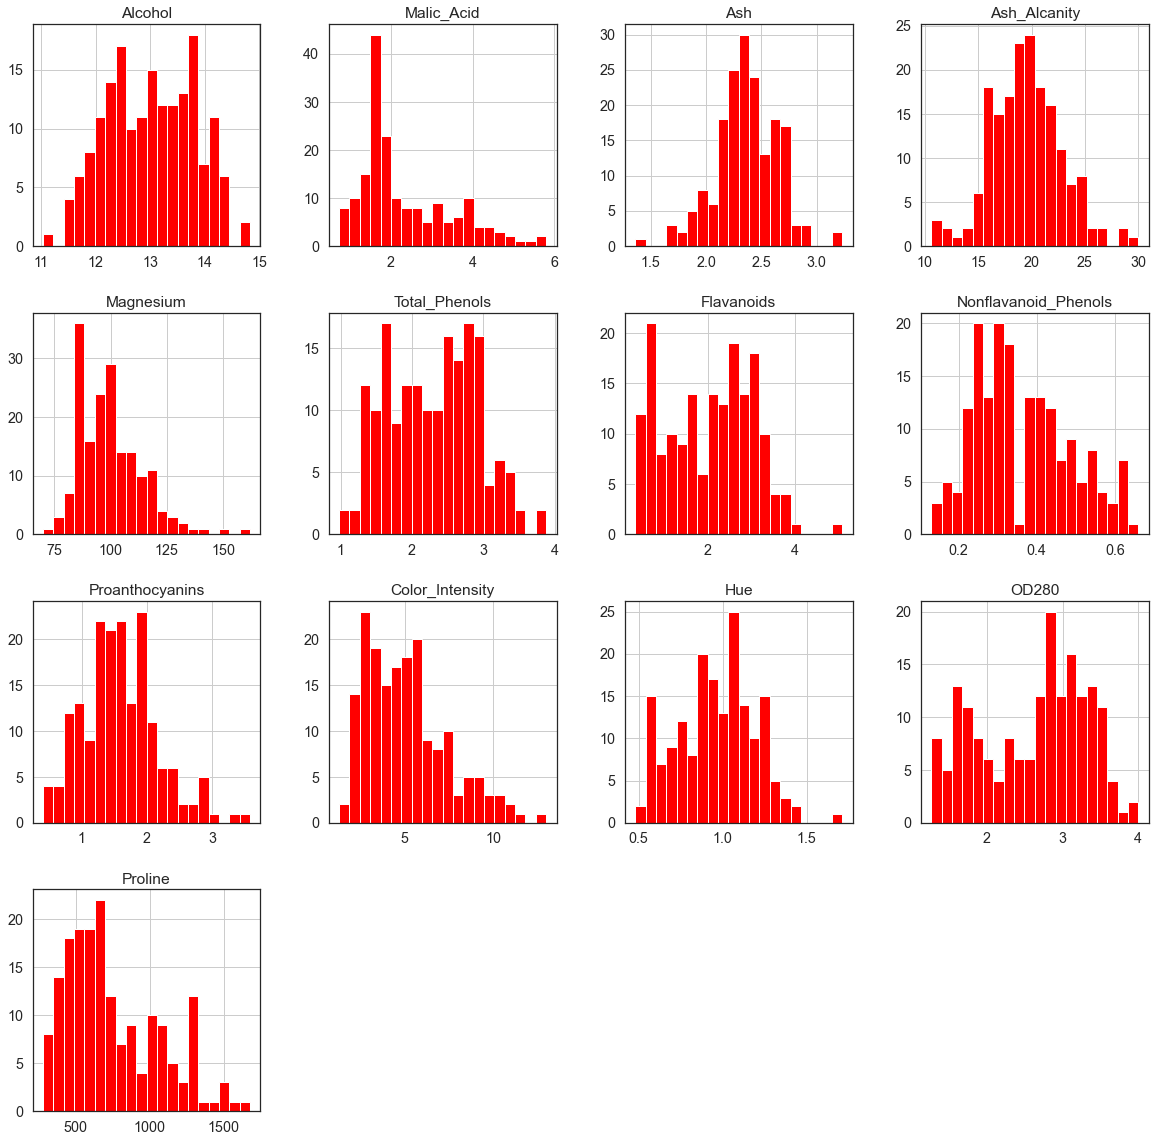

In [8]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,20)})
ax=data.hist(bins=20,color='red' )

#### To reinforce our insights about the data symmetry and their outliers, we can plot some boxplots.
#### "A box plot is a method for graphically depicting groups of numerical data through their quartiles. The box extends from the Q1 to Q3 quartile values of the data, with a line at the median (Q2). The whiskers extend from the edges of box to show the range of the data. The position of the whiskers is set by default to 1.5*IQR (IQR = Q3 - Q1) from the edges of the box. Outlier points are those past the end of the whiskers."

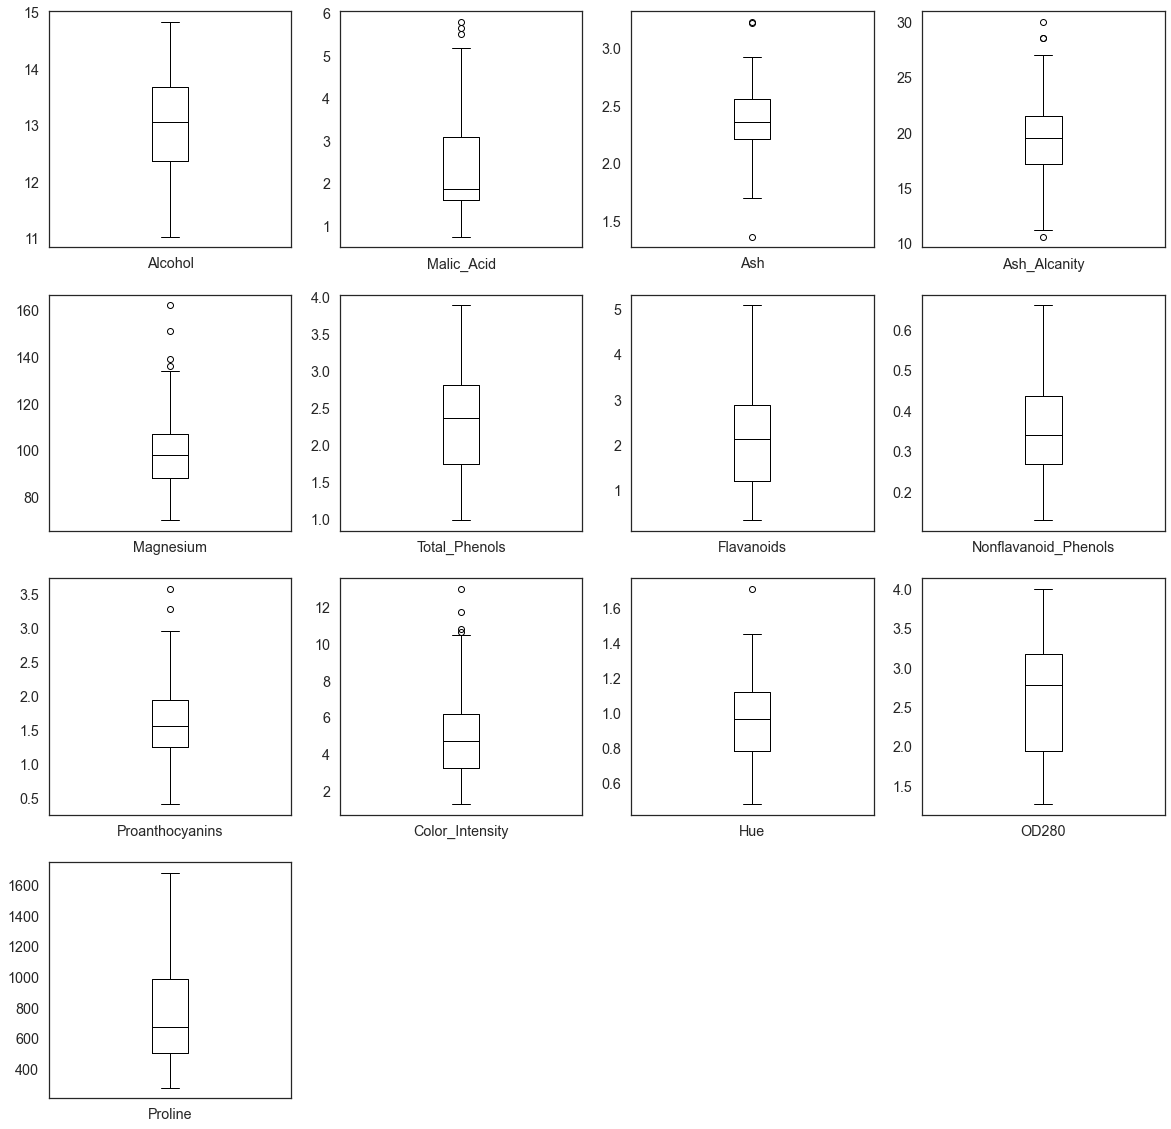

In [9]:
data.plot( kind = 'box', subplots = True, layout = (4,4), sharex = False, sharey = False,color='black')
plt.show()

#### Managing Outliers

#### i)

Text(0.5, 1.0, 'Box plot of Malic_Acid')

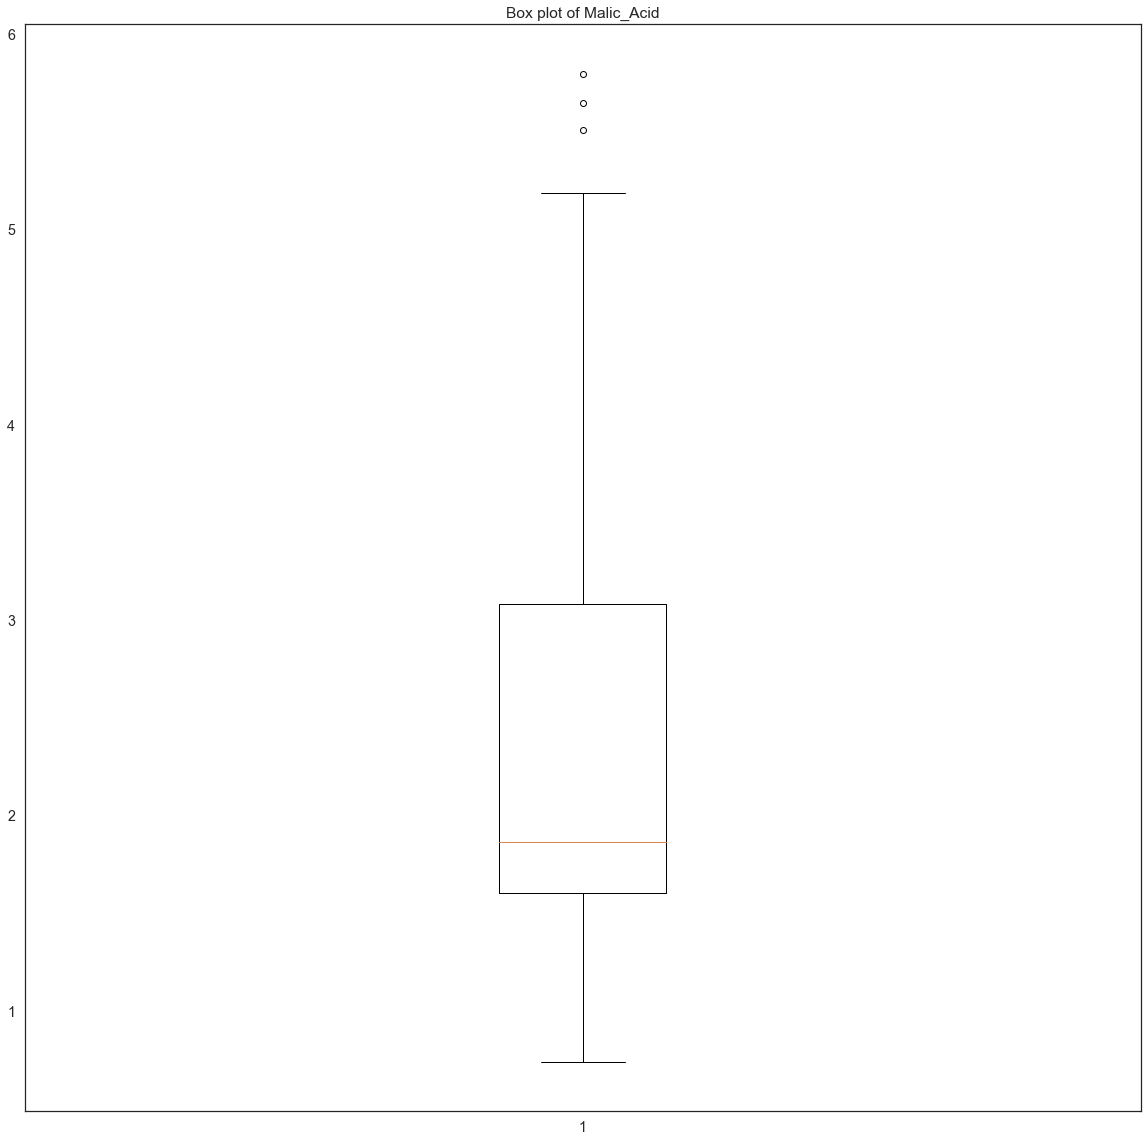

In [10]:
plt.boxplot(data['Malic_Acid'])
plt.title('Box plot of Malic_Acid')

In [11]:
# Finding IQR (Q3-Q1)

# The data points that fall below Q1-1.5*IQR and the data points that fall above Q3+1.5*IQR are generally considered as outliers.

Q1 = np.percentile(data['Malic_Acid'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Malic_Acid'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Malic_Acid'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.605
1.8650000000000002
3.065


In [12]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('Lower limit is : ', low_lim)
print('Upper limit is : ', up_lim)

Lower limit is :  -0.585
Upper limit is :  5.255


In [13]:
outlier = []
for x in data['Malic_Acid']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[5.8, 5.51, 5.65]

In [14]:
# To find the index of the outliers (up_lim)

ind1 = data['Malic_Acid'] > up_lim
data.loc[ind1].index

Int64Index([123, 137, 173], dtype='int64')

In [15]:
# To find the index of the outliers (low_lim)

ind1 = data['Malic_Acid'] < low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [16]:
# Dropping the outliers from the dataset (up_lim)

data.drop([123, 137, 173], inplace=True)

In [17]:
data.shape

(175, 13)

Text(0.5, 1.0, 'Box plot of Malic_Acid')

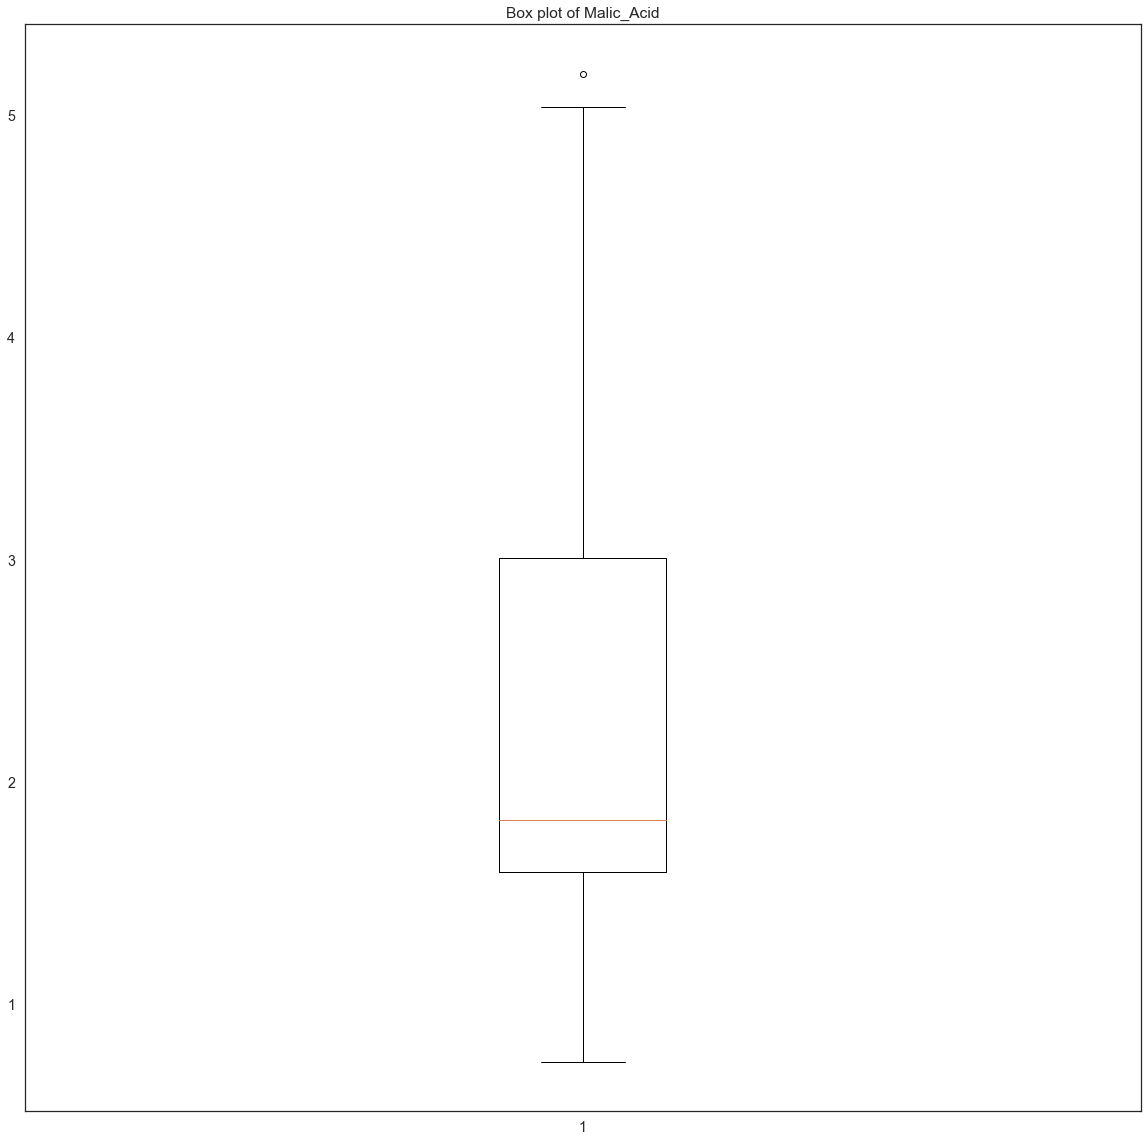

In [18]:
# Plot boxplot to see whether the outliers are reduced

plt.boxplot(data['Malic_Acid'])
plt.title('Box plot of Malic_Acid')

#### ii)

Text(0.5, 1.0, 'Box plot of Magnesium')

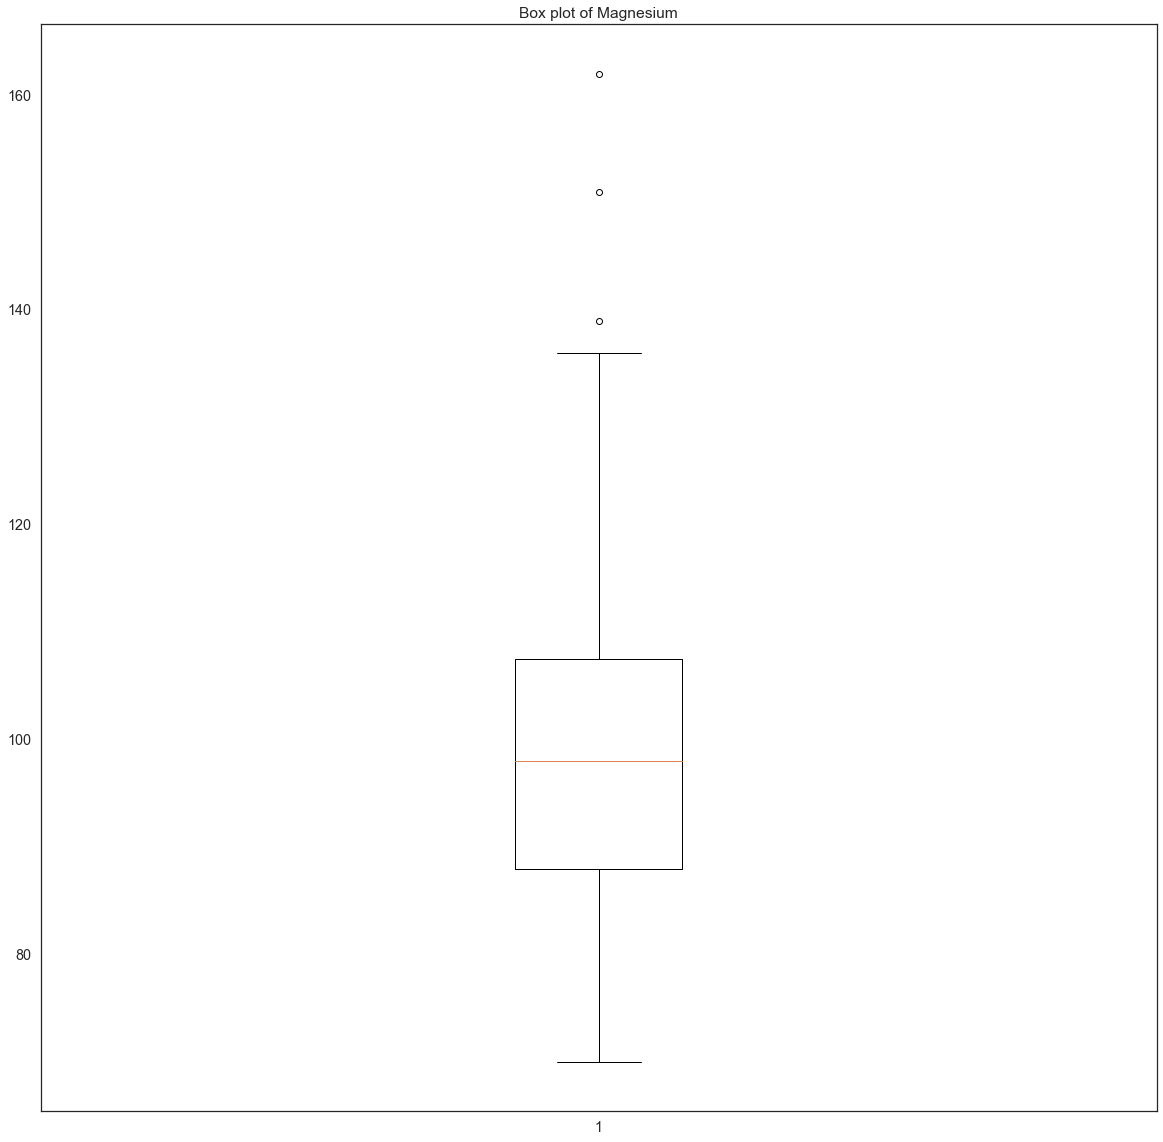

In [19]:
plt.boxplot(data['Magnesium'])
plt.title('Box plot of Magnesium')

In [20]:
# Finding IQR (Q3-Q1)

# The data points that fall below Q1-1.5*IQR and the data points that fall above Q3+1.5*IQR are generally considered as outliers.

Q1 = np.percentile(data['Magnesium'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Magnesium'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Magnesium'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

88.0
98.0
107.5


In [21]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('Lower limit is : ', low_lim)
print('Upper limit is : ', up_lim)

Lower limit is :  58.75
Upper limit is :  136.75


In [22]:
outlier = []
for x in data['Magnesium']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[151, 139, 162]

In [23]:
# To find the index of the outliers (up_lim)

ind1 = data['Magnesium'] > up_lim
data.loc[ind1].index

Int64Index([69, 73, 95], dtype='int64')

In [24]:
# To find the index of the outliers (low_lim)

ind1 = data['Magnesium'] < low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [25]:
# Dropping the outliers from the dataset (up_lim)

data.drop([69, 73, 95], inplace=True)

In [26]:
data.shape

(172, 13)

Text(0.5, 1.0, 'Box plot of Magnesium')

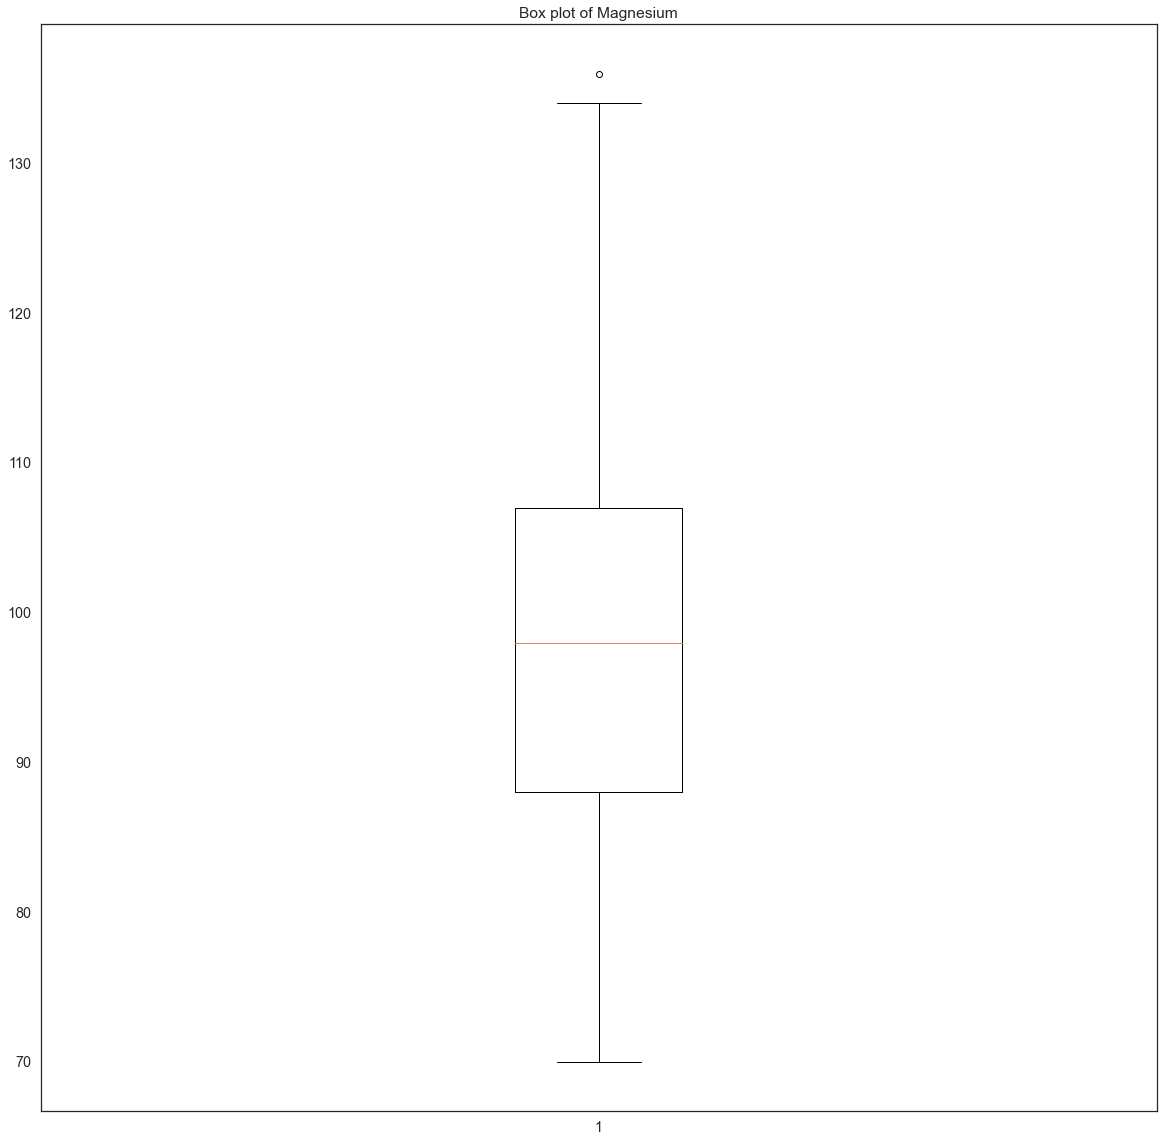

In [27]:
plt.boxplot(data['Magnesium'])
plt.title('Box plot of Magnesium')

#### iii)

Text(0.5, 1.0, 'Box plot of Color_Intensity')

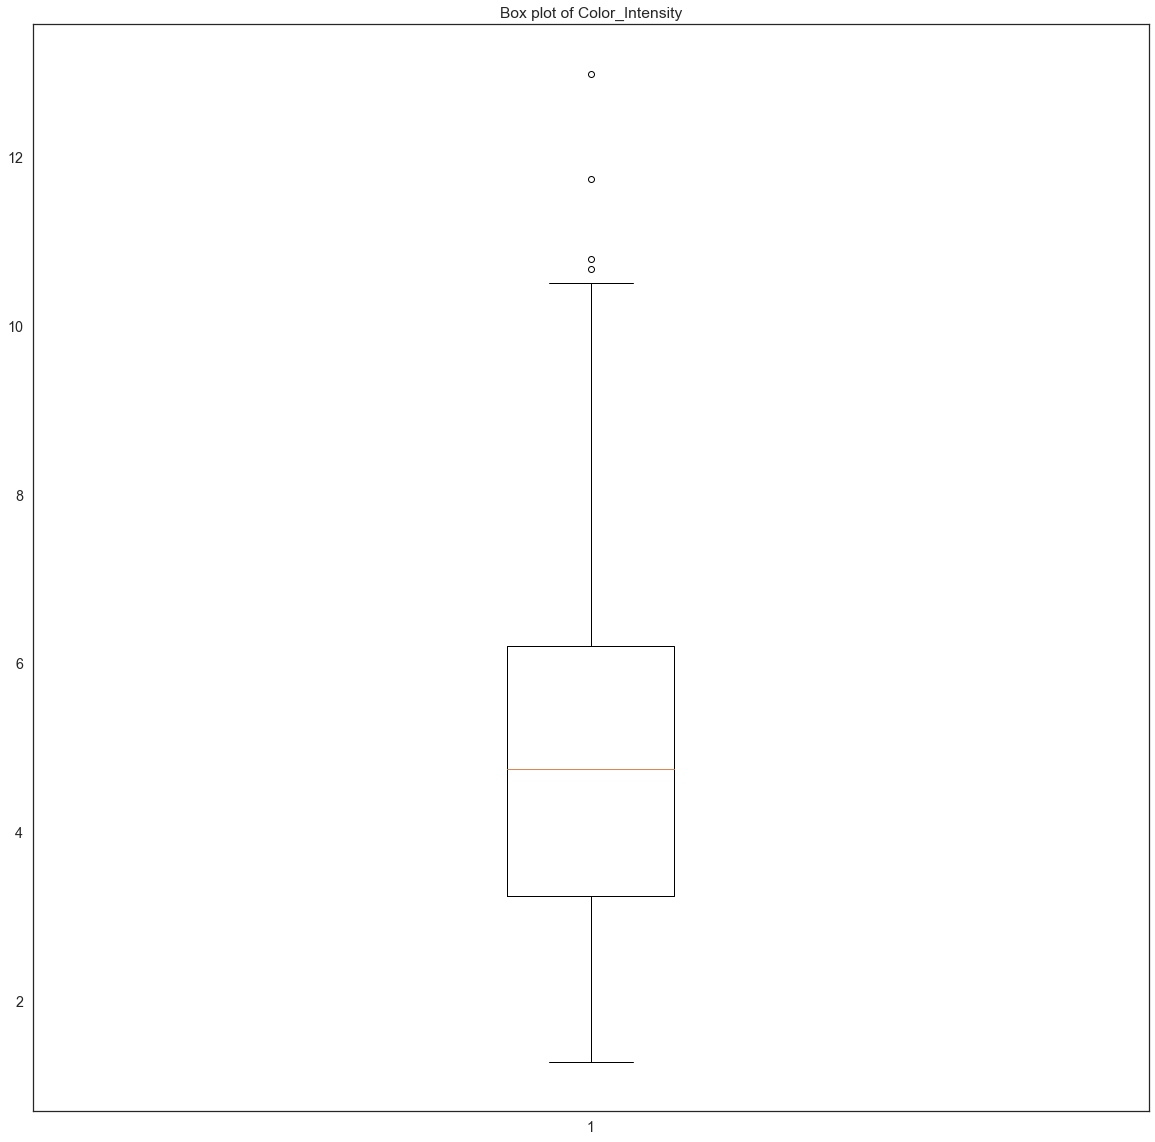

In [28]:
plt.boxplot(data['Color_Intensity'])
plt.title('Box plot of Color_Intensity')

In [29]:
# Finding IQR (Q3-Q1)

# The data points that fall below Q1-1.5*IQR and the data points that fall above Q3+1.5*IQR are generally considered as outliers.

Q1 = np.percentile(data['Color_Intensity'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Color_Intensity'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Color_Intensity'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

3.25
4.75
6.225


In [30]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('Lower limit is : ', low_lim)
print('Upper limit is : ', up_lim)

Lower limit is :  -1.2124999999999995
Upper limit is :  10.6875


In [31]:
outlier = []
for x in data['Color_Intensity']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[10.8, 13.0, 11.75]

In [32]:
# To find the index of the outliers (up_lim)

ind1 = data['Color_Intensity'] > up_lim
data.loc[ind1].index

Int64Index([151, 158, 159], dtype='int64')

In [33]:
# To find the index of the outliers (low_lim)

ind1 = data['Color_Intensity'] < low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [34]:
# Dropping the outliers from the dataset (up_lim)

data.drop([151, 158, 159], inplace=True)

In [35]:
data.shape

(169, 13)

Text(0.5, 1.0, 'Box plot of Color_Intensity')

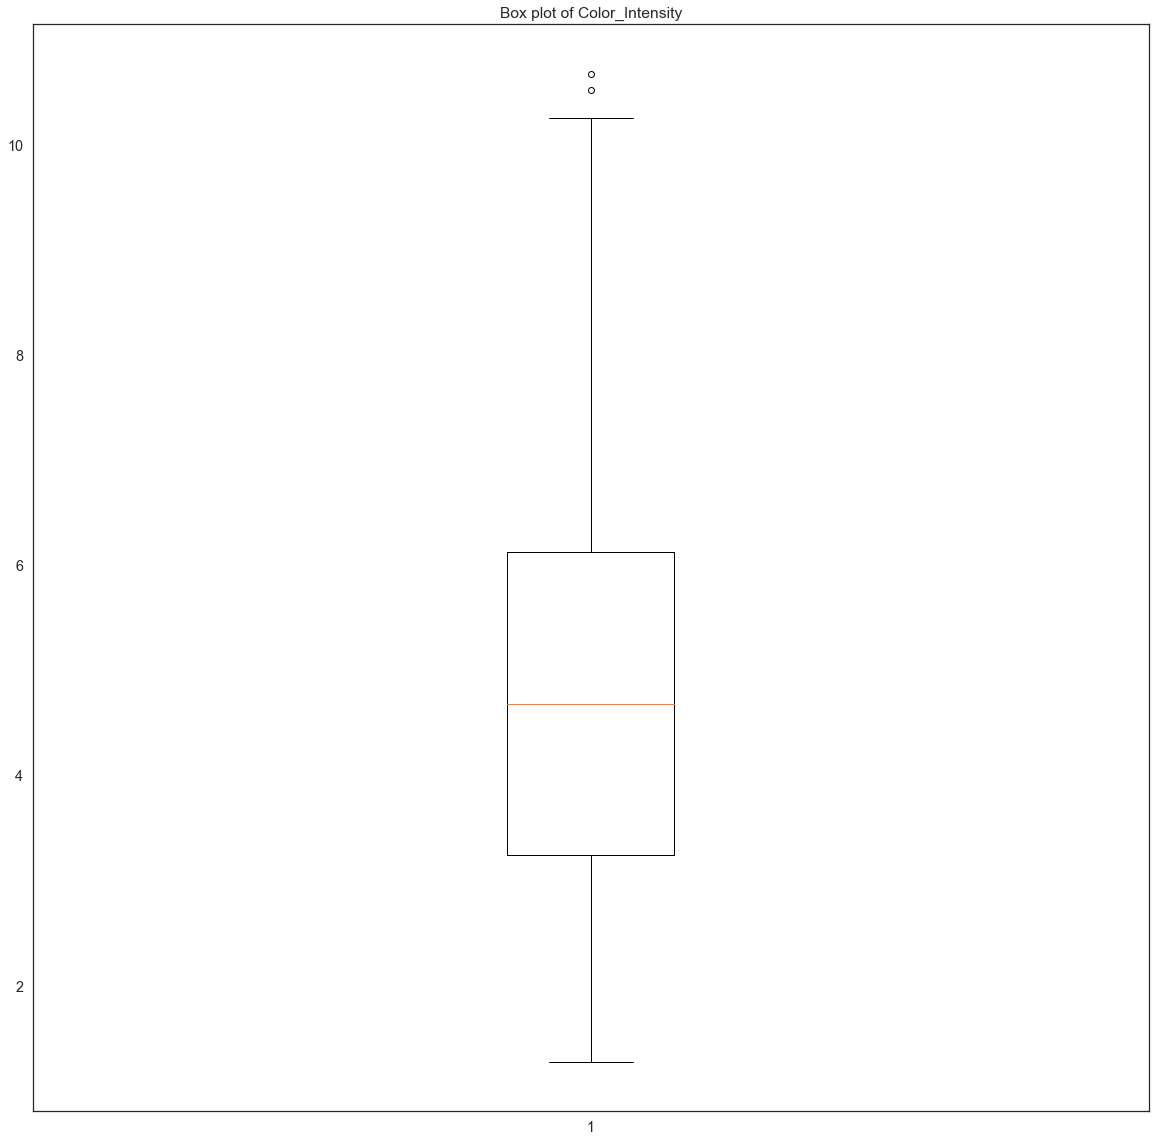

In [36]:
plt.boxplot(data['Color_Intensity'])
plt.title('Box plot of Color_Intensity')

#### iv)

Text(0.5, 1.0, 'Box plot of Proanthocyanins')

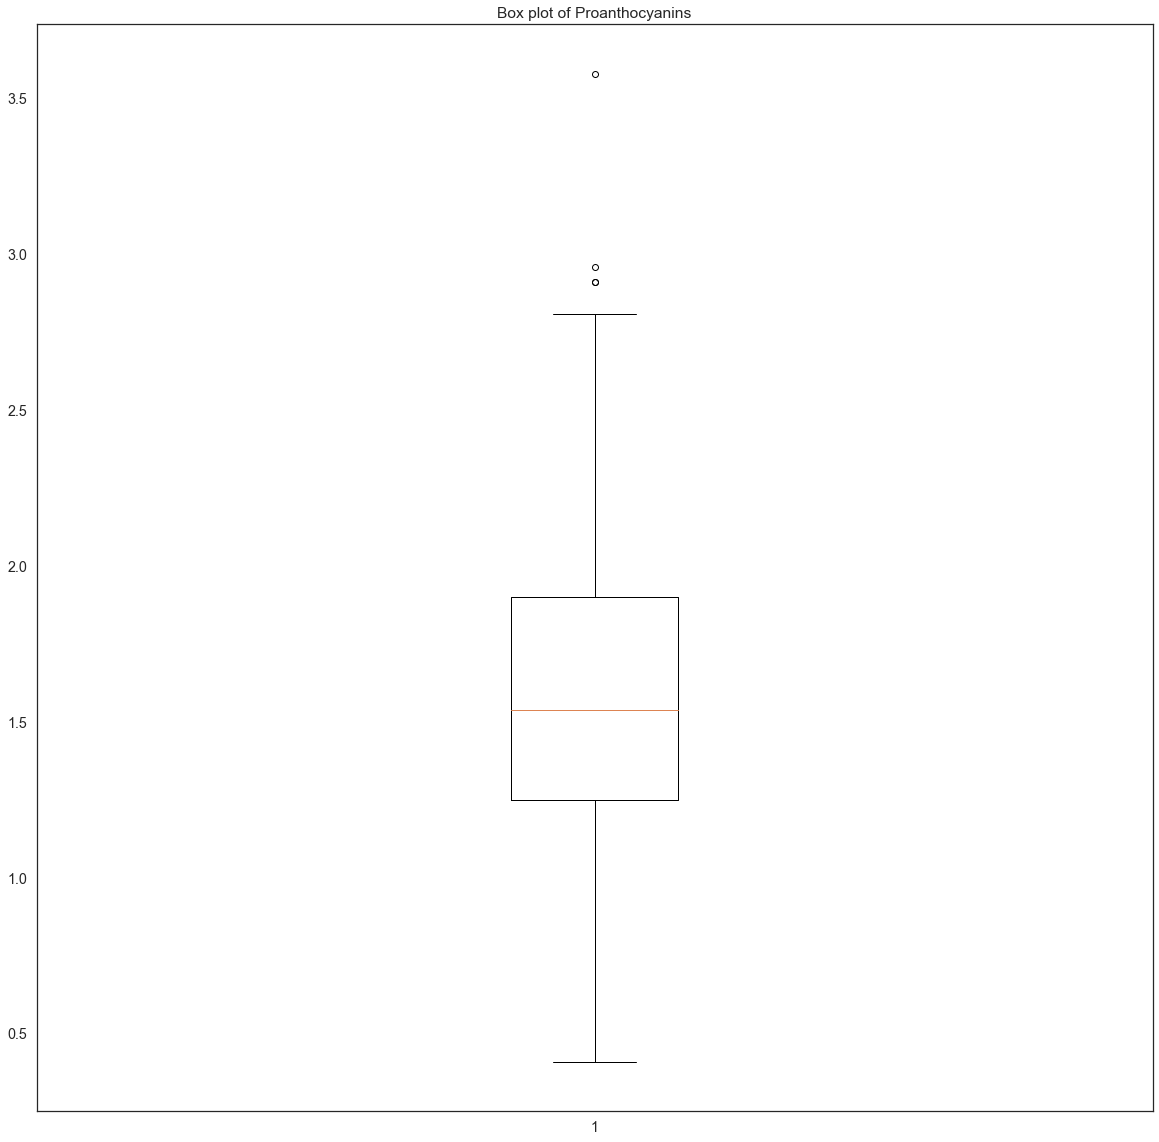

In [37]:
plt.boxplot(data['Proanthocyanins'])
plt.title('Box plot of Proanthocyanins')

In [38]:
# Finding IQR (Q3-Q1)

# The data points that fall below Q1-1.5*IQR and the data points that fall above Q3+1.5*IQR are generally considered as outliers.

Q1 = np.percentile(data['Proanthocyanins'], 25, interpolation='midpoint')
Q2 = np.percentile(data['Proanthocyanins'], 50, interpolation='midpoint')
Q3 = np.percentile(data['Proanthocyanins'], 75, interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

1.25
1.54
1.9


In [39]:
IQR = Q3-Q1
low_lim = Q1-1.5*IQR
up_lim = Q3+1.5*IQR
print('Lower limit is : ', low_lim)
print('Upper limit is : ', up_lim)

Lower limit is :  0.27500000000000013
Upper limit is :  2.875


In [40]:
outlier = []
for x in data['Proanthocyanins']:
    if ((x>up_lim) or (x<low_lim)):
        outlier.append(x)
outlier

[2.96, 2.91, 3.58, 2.91]

In [41]:
# To find the index of the outliers (up_lim)

ind1 = data['Proanthocyanins'] > up_lim
data.loc[ind1].index

Int64Index([14, 50, 110, 124], dtype='int64')

In [42]:
# To find the index of the outliers (low_lim)

ind1 = data['Proanthocyanins'] < low_lim
data.loc[ind1].index

Int64Index([], dtype='int64')

In [43]:
# Dropping the outliers from the dataset (up_lim)

data.drop([14, 50, 110, 124], inplace=True)

In [44]:
data.shape

(165, 13)

Text(0.5, 1.0, 'Box plot of Proanthocyanins')

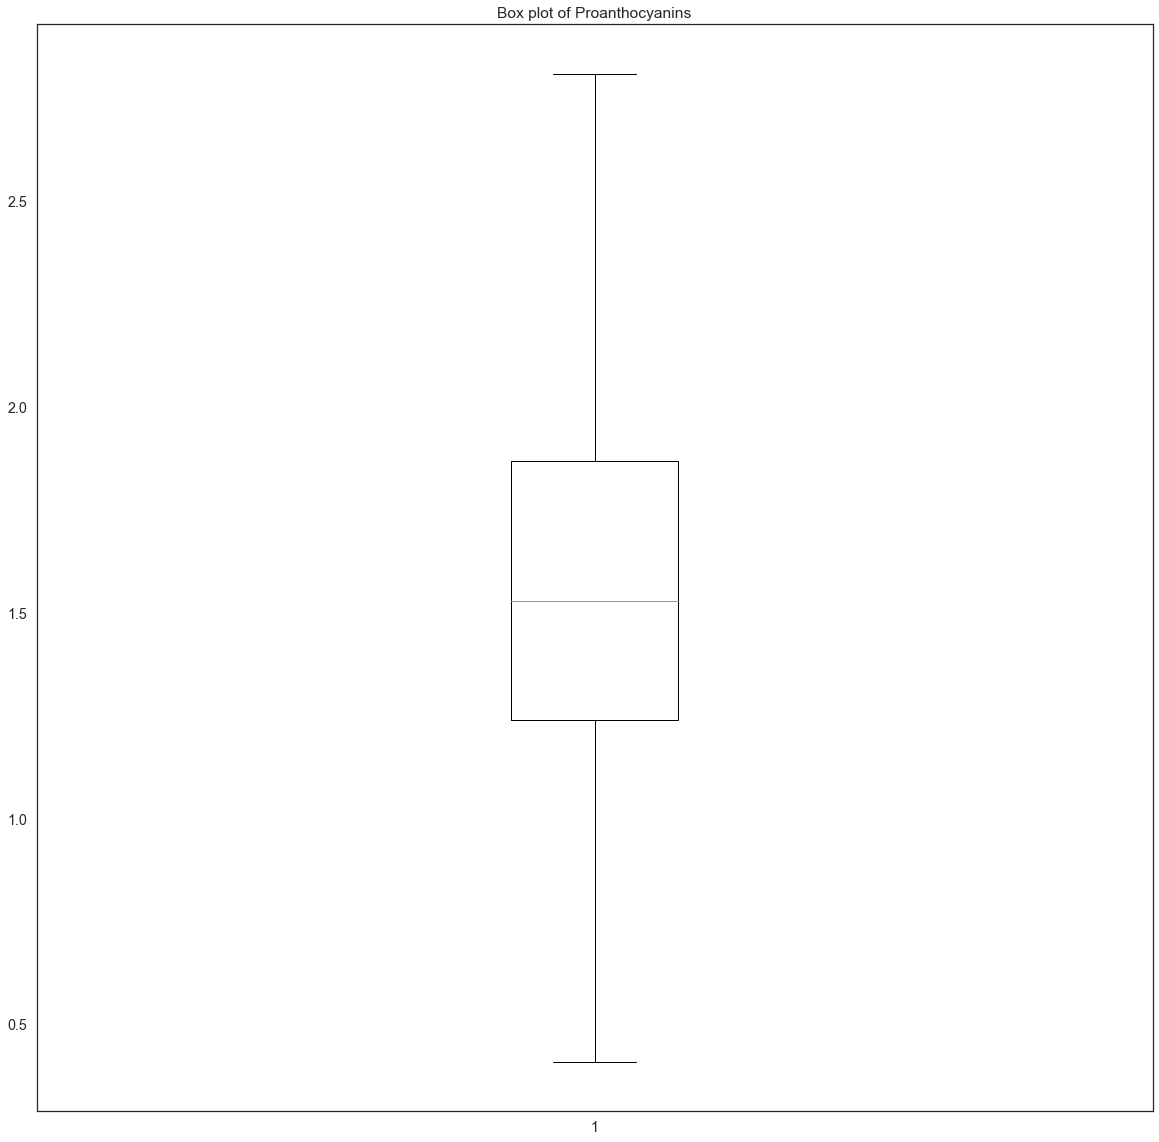

In [45]:
plt.boxplot(data['Proanthocyanins'])
plt.title('Box plot of Proanthocyanins')

## Standard Scaling

#### We are going to use a K-means algorithm, as it uses the distance as the principal metric to alocate the data in your respective cluster we need to be careful with scale, because we can give more "relevance" to large scale features and despite the low scale ones.
#### To prevent that, we can use lot of Scaling methods, in this case we are going to standardize the data: to have a 0 mean and unit variance.

In [46]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_cluster=data.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

#### Checking if the Standardization was made correctly, looking for mean = 0 and std = 1.

In [47]:
data_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02,1.650000e+02
mean,2.240632e-15,-2.058959e-16,-1.776357e-16,-3.714201e-16,1.271710e-16,-1.116952e-16,-1.251524e-16,3.458513e-16,-5.147398e-17,2.287732e-16,-4.064089e-16,-1.561041e-16,-2.489591e-16
std,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00,1.003044e+00
min,-2.447724e+00,-1.488491e+00,-3.726677e+00,-2.773626e+00,-2.268490e+00,-2.084167e+00,-1.695591e+00,-1.934566e+00,-2.229236e+00,-1.717706e+00,-1.913257e+00,-1.901669e+00,-1.496939e+00
25%,-7.991557e-01,-6.690495e-01,-5.528955e-01,-6.961249e-01,-8.628117e-01,-8.958558e-01,-8.317238e-01,-7.780322e-01,-5.790880e-01,-8.010265e-01,-7.397987e-01,-8.700243e-01,-7.885312e-01
50%,5.611669e-02,-4.087565e-01,-3.623345e-02,-9.805652e-02,-8.187955e-02,3.552280e-02,1.024587e-01,-1.997650e-01,-2.530347e-03,-1.356195e-01,7.259579e-02,2.322806e-01,-2.301019e-01
75%,8.370176e-01,7.191801e-01,6.649508e-01,6.573983e-01,6.209594e-01,8.384354e-01,8.357418e-01,5.437213e-01,6.734338e-01,5.251343e-01,7.044582e-01,7.975651e-01,7.750709e-01
max,2.262472e+00,2.801524e+00,3.174452e+00,2.860808e+00,2.885663e+00,2.572727e+00,3.065726e+00,2.443742e+00,2.542276e+00,2.656298e+00,3.367307e+00,1.956398e+00,2.976878e+00


## Normalization

In [48]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
data_cluster = norm.fit_transform(data_cluster)

## Principal Component Analysis (PCA)

#### As we are dealing with a multi-dimensional dataset, we will be using a Principal Component Analysis (PCA) to reduce its dimension and make it "plottable" in a cartesian plane. Remebering that we will probably lose some information/variance in this process but it is just for viualization purposes.

In [49]:
from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_cluster)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 57.19%


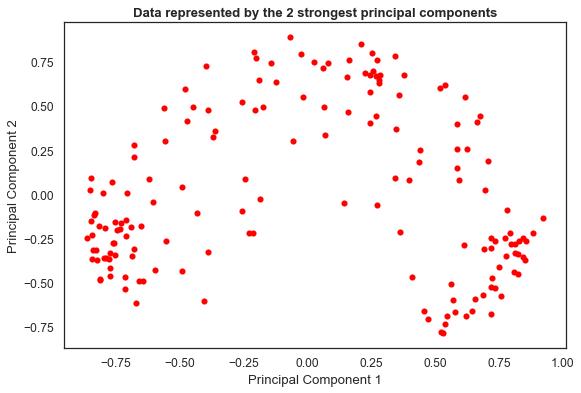

In [50]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], color='red',lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

## Model Implementation

## k Means Clustering

#### We are using the K-means algorithm, to choose K (number of clusters) we have two techniques: the Silhouette Score and K-means Inertia (with Elbow analysis).

#### First, we will compute all inertias. Basically, the lower the Inertia the better the clustering.

In [51]:
import sklearn.cluster as cluster

inertia = []
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(data_cluster)
    inertia.append(kmeans.inertia_)

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.78it/s]


#### Next, we will compute the silhouette score. Here, the bigger score the better the clustering.

In [52]:
from sklearn.metrics import silhouette_score

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i,
               init='k-means++',
               n_init=15,
               max_iter=500,
               random_state=17)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')

100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  5.00it/s]


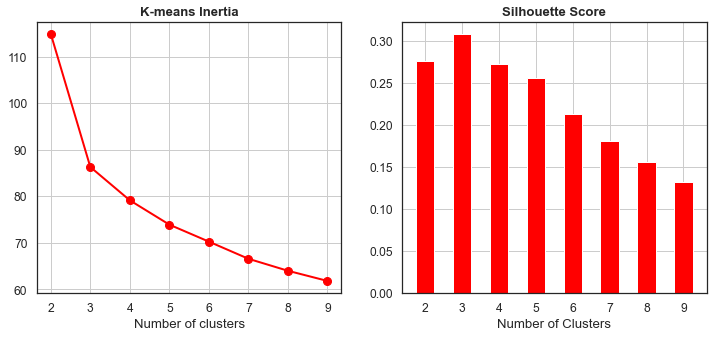

In [53]:
sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(12,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(inertia)+2), inertia, marker='o',lw=2,ms=8,color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')


plt.show()

#### From the above diagrams, it can be concluded that the optimum number of clusters is 3. Hence, we are performing k Means clustering with n_clusters = 3.

In [54]:
kmeans = cluster.KMeans(n_clusters=3,random_state=17,init='k-means++')
kmeans_labels = kmeans.fit_predict(data_cluster)

centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

pd.Series(kmeans_labels).value_counts()

2    60
0    57
1    48
dtype: int64

## Cluster Visualization - K Means (PCA)

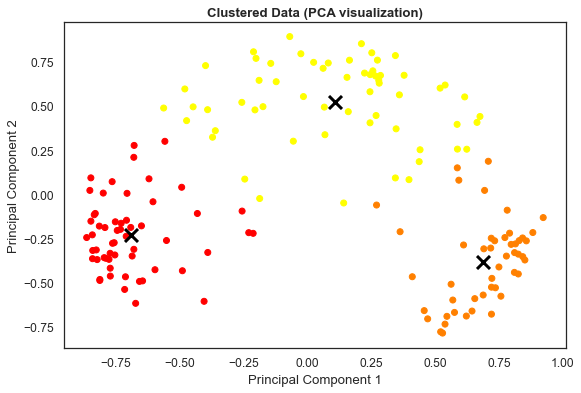

In [55]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=kmeans_labels, cmap='autumn')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1],
            marker='x', s=169, linewidths=3,
            color='black', zorder=10,lw=3)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

#### The above diagram shows the clustering of the given dataset using the method - k Means Clustering,  and we have 3 distinct clusters. That means, we have three  different categories/clusters of Wine.

## Agglomerative Hierarchical Clustering

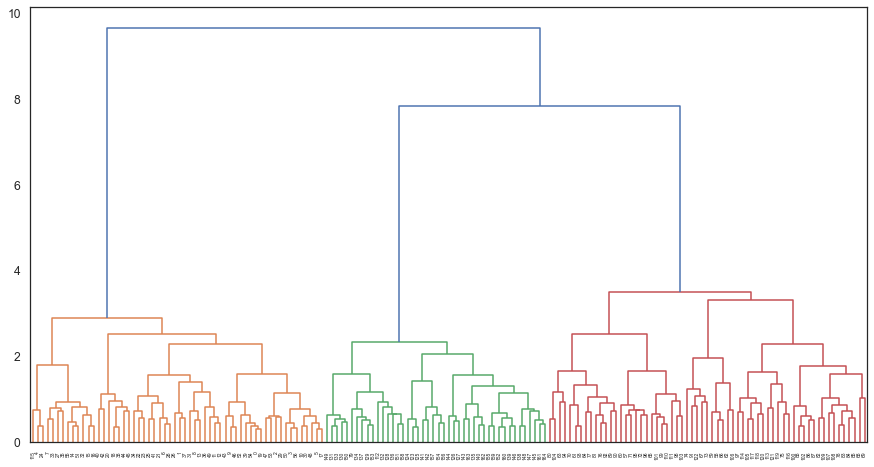

In [56]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(data_cluster, method='ward')
plt.figure(figsize=(15,8))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.show()

#### From the above dendrogram, we have found that the optimal cluster size is 3.

In [57]:
from sklearn.cluster import AgglomerativeClustering

In [58]:
hc = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'ward')
hc_labels = hc.fit_predict(data_cluster)

pd.Series(hc_labels).value_counts()

0    63
1    58
2    44
dtype: int64

## Cluster Visualization - Agglomerative Hierarchical Clustering (PCA)

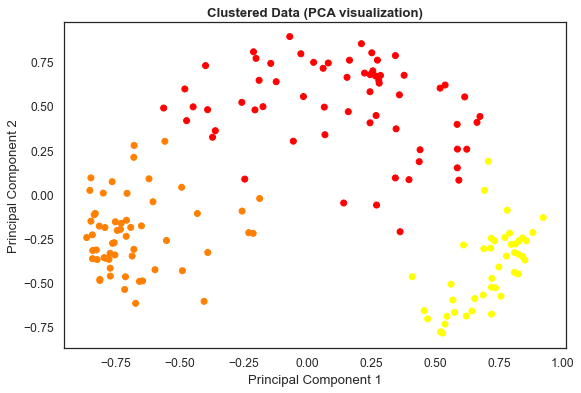

In [59]:
sns.set(style='white', rc={'figure.figsize':(9,6)},font_scale=1.1)

plt.scatter(x=pca_2_result[:, 0], y=pca_2_result[:, 1], c=hc_labels, cmap='autumn')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustered Data (PCA visualization)',fontweight='bold')
plt.show()

#### The above diagram shows the clustering of the given dataset using the method - Agglomerative Hierarchical Clustering, and we have 3 distinct clusters. That means, we have three different categories/clusters of Wine.

## Inference :

#### We have performed k Means clustering and Agglomerative hierarchical clustering techniques in the given Wine dataset. We were able to identify the optimum number of clusters as 3 and have plotted it on the basis of PCA as shown above. 